In [1]:
# Import das bibliotecas necessarias:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from cmcrameri import cm # Necessary to use ROMA color map - You migth want to comment this line and use other color map
import sys # Necessary to read the path of python codes' folder
import utm # If necessary to convert geographic to projected coordinates
mypath = sys.path.append('/home/romulo/my_project_dir/Inversao_magnetica/codes/modules/Real_Arraial/')
import auxiliars, filtering
from grids import my_regular, my_profile
from scipy.interpolate import griddata
import os
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import prism, noise, plot_3D, auxiliars, salve_doc, derivative

In [2]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests')
data_cubo = pd.read_table('data_ajustment_mag_arraial_29_11_2021_background0.csv', sep=',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (20,20))
X = np.reshape(np.array(data_cubo['North(m)']), (20,20))
Y = np.reshape(np.array(data_cubo['East(m)']), (20,20))

In [3]:
data_cubo

,North(m),East(m),Anomalia Magnética(nT)
0,7.455632e+06,803484.484404,-102.266401
1,7.455982e+06,803491.547619,-67.340032
2,7.456332e+06,803498.609914,-67.340032
3,7.456682e+06,803505.671289,-67.340032
4,7.457031e+06,803512.731744,-67.340032
...,...,...,...
395,7.460734e+06,810774.476946,-144.769695
396,7.461084e+06,810781.693701,-117.964062
397,7.461434e+06,810788.909514,-137.045579
398,7.461784e+06,810796.124385,-122.671857


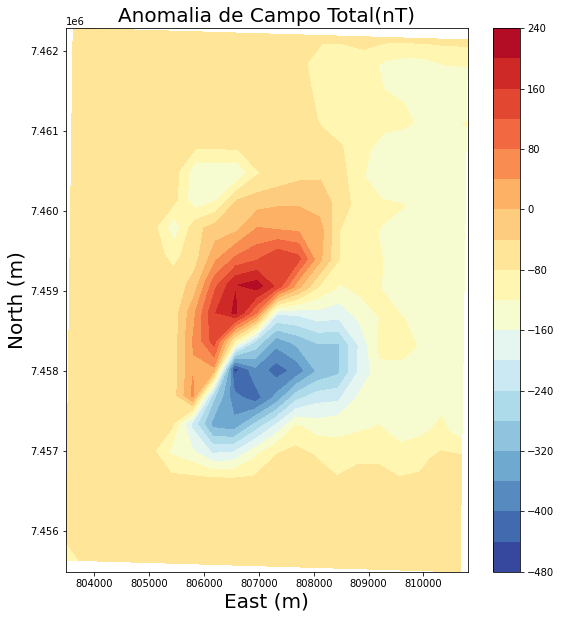

In [4]:
%matplotlib inline
#xs = [x1, x1, x2, x2, x1]
#ys = [y1, y2, y2, y1, y1]

#xs1 = [pointx[0], pointx[0], pointx[5], pointx[5], pointx[0]]

#ys1 = [pointy[0], pointy[5], pointy[5], pointy[0], pointy[0]]

#flechax = [[numpy.absolute(pointx[0] + pointx[5])], [pointx[5]]]
#flechay = [[numpy.absolute(pointy[0] + pointy[5])], [pointy[5]]]


#origin = [[numpy.absolute(pointx[0] + pointx[5])], [[numpy.absolute(pointy[0] + pointy[5])]]]
#ponta = [[pointx[5]], [pointy[5]]]

#print(ponta)

# graficos
plt.close('all')
plt.figure(figsize=(9,10))
#******************************************************
#copia = plt.contour(Y, X, tfa_final, levels = 16, cmap = 'jet', linewidths = 2)
#plt.clabel(copia , inline=2, fontsize=12, colors = 'k')
#plt.set(copia,'LineWidth',[5])
original = plt.contourf(Y, X, anomaly_cubo, 20, cmap = plt.cm.RdYlBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()


In [5]:
# definicao da nova altitude:
dz = 400.0
mag_up = filtering.my_continuation(Y, X, anomaly_cubo, dz)
mag_up = mag_up.reshape(X.shape)
print(mag_up.shape)

(20, 20)


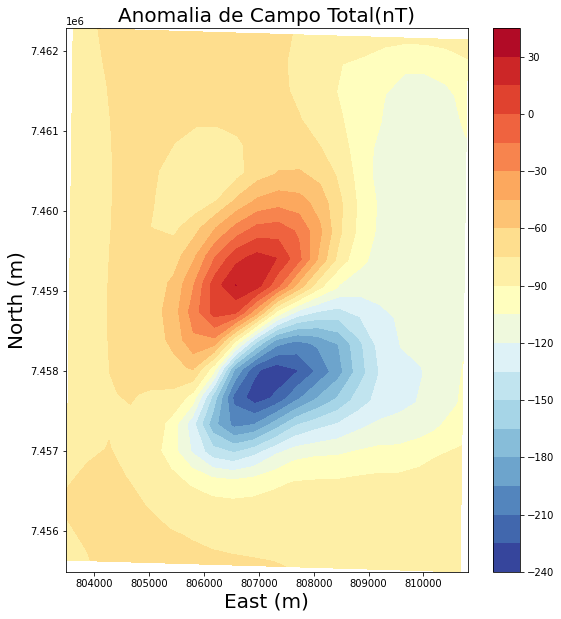

In [6]:
%matplotlib inline
#xs = [x1, x1, x2, x2, x1]
#ys = [y1, y2, y2, y1, y1]

#xs1 = [pointx[0], pointx[0], pointx[5], pointx[5], pointx[0]]

#ys1 = [pointy[0], pointy[5], pointy[5], pointy[0], pointy[0]]

#flechax = [[numpy.absolute(pointx[0] + pointx[5])], [pointx[5]]]
#flechay = [[numpy.absolute(pointy[0] + pointy[5])], [pointy[5]]]


#origin = [[numpy.absolute(pointx[0] + pointx[5])], [[numpy.absolute(pointy[0] + pointy[5])]]]
#ponta = [[pointx[5]], [pointy[5]]]

#print(ponta)

# graficos
plt.close('all')
plt.figure(figsize=(9,10))
#******************************************************
#copia = plt.contour(Y, X, tfa_final, levels = 16, cmap = 'jet', linewidths = 2)
#plt.clabel(copia , inline=2, fontsize=12, colors = 'k')
#plt.set(copia,'LineWidth',[5])
original = plt.contourf(Y, X, mag_up, 20, cmap = plt.cm.RdYlBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()


In [7]:
print(np.mean(mag_up))

-89.37790993940826


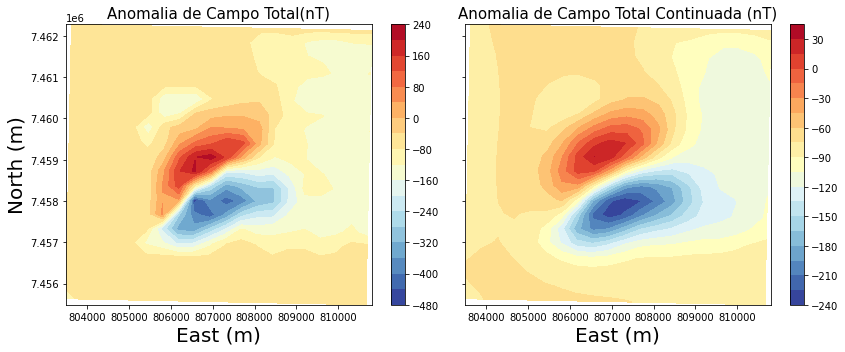

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5),
                               tight_layout=True, sharey=True)

original = ax1.contourf(Y, X, anomaly_cubo, 20, cmap = plt.cm.RdYlBu_r)

continuado = ax2.contourf(Y, X, mag_up, 20, cmap = plt.cm.RdYlBu_r)

ax1.set_title('Anomalia de Campo Total(nT)', fontsize = 15)
ax2.set_title('Anomalia de Campo Total Continuada (nT)', fontsize = 15)
ax1.set_xlabel('East (m)', fontsize = 20)
ax1.set_ylabel('North (m)', fontsize = 20)
ax2.set_xlabel('East (m)', fontsize = 20)
fig.colorbar(original, ax=ax1)
fig.colorbar(continuado, ax=ax2)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(5))
#ax1.set_xlabel('counts')
#ax1.set_ylabel('x')
#ax2.set_ylabel('x')

plt.show()

## Deconvolução de Euler

In [9]:
Z = np.ones((20,20))*(-20.0)
print(Z)

[[-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20

In [10]:
def matrix_Euler(X, dx_act, Y, dy_act, Z, dz_act, eta, tfa_final, N):
    A, B = 0., 0.
    B = np.reshape(X*dx_act + Y*dy_act + Z*dz_act + eta*tfa_final, (N, 1))
    A = np.hstack((np.reshape(dx_act, (N, 1)), 
            np.reshape(dy_act, (N, 1)), 
            np.reshape(dz_act, (N, 1)), 
            np.zeros((N,1)) + eta))
    return A, B

In [11]:
def Euler_calc(X, Y, Z, tfa_final, eta, N):
    
    n = len(eta)
    #Calculo das derivadas espaciais
    delta = np.abs(X[0][0] - X[0][1])*0.1

    dx_act = np.reshape(derivative.my_xderiv(X, Y, tfa_final, n = 1), (20,20))

    dy_act = np.reshape(derivative.my_yderiv(X, Y, tfa_final, n = 1), (20,20))

    dz_act = np.reshape(derivative.my_zderiv(X, Y, tfa_final, n = 1), (20,20))
    
    #Calculo da Deconvolução de Euler
    final_result = np.zeros((4, n))
    for i in range(n):
        A, B = matrix_Euler(X, dx_act, Y, dy_act, Z, dz_act, eta[i], tfa_final, N)
        result = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, B))
        final_result[0, i], final_result[1, i], final_result[2, i], final_result[3, i]  = result[0], result[1], result[2], result[3]
    
    return final_result

In [12]:
eta = [1., 2., 3.]
N = 20 * 20

In [13]:
final_result = Euler_calc(X, Y, Z, anomaly_cubo, eta, N)

In [14]:
print(final_result)

[[ 7.45870168e+06  7.45870168e+06  7.45870168e+06]
 [ 8.07181598e+05  8.07181598e+05  8.07181598e+05]
 [ 1.95445436e+02  4.91638213e+02  7.87830990e+02]
 [-8.88563147e+01 -8.91171123e+01 -8.92040449e+01]]


## Correlação

In [15]:
import derivative
import equivalentlayer
from equivalentlayer import my_rtp_layer
from time import time
from statistical import my_correlation_coef

In [16]:
shp = (20,20)
shape = X.shape
X_1 = np.reshape(X, (shape[0]**2))
Y_1 = np.reshape(Y, (shape[0]**2))
Z_1 = np.reshape(Z, (shape[0]**2))
mag_up_1 = np.reshape(mag_up, (shape[0]**2))

data = [X_1, Y_1, Z_1, mag_up_1]

inc, dec = -36.346, -21.826

In [17]:
# Define the setting of equivalent layer to fit magnetic data
areal = (X.min(), X.max(), Y.min(), Y.max()) # Same area of data
shapel = (15,15)
depthl = 700.

# Compute the equivalent layer
mylayer = equivalentlayer.my_layer(areal, shapel, depthl)

In [18]:
# Create a range of inclination and declination
grid_inc = np.linspace(-90., 90., 25)
grid_dec = np.linspace(-90., 90., 15)
D, I = np.meshgrid(grid_dec, grid_inc)

# Create a zero matrix to allocate the results
C = np.zeros_like(I)

In [19]:
# Compute the cross-correlation and time of processing
timei = time()
#
for cols, d in enumerate(grid_dec):
    for rows, i in enumerate(grid_inc):
        if i >= -20. or i <= 20.:
            rtp = equivalentlayer.my_rtp_layer(data, shp, mylayer, shapel, 1.e-3, inc, dec, i, d)
            C[rows, cols] = my_correlation_coef(
                derivative.my_totalgrad(X_1.reshape(shp), Y_1.reshape(shp), rtp.reshape(shp)),
                derivative.my_zderiv(X_1.reshape(shp), Y_1.reshape(shp), rtp.reshape(shp)))
        else:
            #rtpdata = filtering.reduction(north.reshape(shp), east.reshape(shp), di.reshape(shp), inc, dec, i, d)
            rtpdata = filtering.reduction(Y_1.reshape(shp), X_1.reshape(shp), dup.reshape(shp), inc, dec, i, d)
            C[rows, cols] = my_correlation_coef(
                derivative.my_totalgrad(X_1.reshape(shp), Y_1.reshape(shp), rtp.reshape(shp)),
                derivative.my_zderiv(X_1.reshape(shp), Y_1.reshape(shp), rtp.reshape(shp)))
#
timef = time()

In [20]:
# Import an statistical function to analyze the data
from statistical import my_analysis

# Analysis of correlation coefficients
_ = my_analysis(C)

Minimum:    -0.342 (No Unit)
Maximum:     0.482 (No Unit)
Mean value:  0.080 (No Unit)
Variation:   0.824 (No Unit)


In [21]:
# Interpolate the result to better visualization
shpi = (121, 121)
Di, Ii = my_regular((-70., 70., -70., 70.), shpi)

Ci = griddata((D.reshape(D.size), I.reshape(I.size)), C.reshape(C.size), (Di, Ii), method = 'cubic')

In [22]:
# Search for the interpolated result
p1, p2 = np.where(Ci.reshape(shpi) == Ci.max())
pimax = float(Ii.reshape(shpi)[p1, p2])
pdmax = float(Di.reshape(shpi)[p1, p2])
print ('(I,D) for maximum coefficient')
print ('Inclination: %.2f' % pimax)
print ('Declination: %.2f'% pdmax)

(I,D) for maximum coefficient
Inclination: -18.67
Declination: -63.00


In [23]:
# Setting x and y axis for plotting
xdec = np.around(np.linspace(Di.min(), Di.max(), 7), decimals = 2)
yinc = np.around(np.linspace(Ii.min(), Ii.max(), 7), decimals = 2)

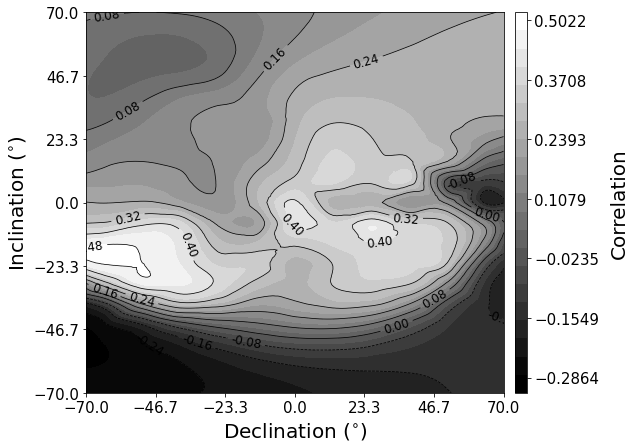

In [24]:
# Plotting fitted data
plt.figure(figsize=(8,7))
cc = plt.tricontour(Di, Ii, Ci, 10, colors = 'k', linewidths = 0.75)
cl = plt.clabel(cc, inline = 1, fontsize = 12, fmt = '%1.2f')
cs = plt.tricontourf(Di, Ii, Ci, 20, cmap = plt.cm.gray, vmin = Ci.min(), vmax = Ci.max())
cb = plt.colorbar(cs, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(np.linspace(Ci.min(), Ci.max(), 7))
cb.set_label('Correlation', fontsize = 20, labelpad = 10)
cb.ax.tick_params(labelsize = 15)
plt.xlabel('Declination ($^{\circ}$)', fontsize = 20, labelpad = 5)
plt.ylabel('Inclination ($^{\circ}$)', fontsize = 20, labelpad = 5)
plt.xticks(xdec, fontsize = 15)
plt.yticks(yinc, fontsize = 15)
plt.show()

## Salvando Data Frame

In [25]:
shape = X.shape
print(shape)
X = np.reshape(X, (shape[0]**2, 1))
Y = np.reshape(Y, (shape[0]**2, 1))
mag_up = np.reshape(mag_up, (shape[0]**2, 1))

cabecalho = ['North(m)']
Data_f = pd.DataFrame(data = X, index = None, columns=cabecalho)
Data_f['East(m)'] = Y
Data_f['Anomalia Magnética(nT)'] = mag_up

(20, 20)


In [26]:
Data_f

,North(m),East(m),Anomalia Magnética(nT)
0,7.455632e+06,803484.484404,-78.693359
1,7.455982e+06,803491.547619,-75.593620
2,7.456332e+06,803498.609914,-74.401682
3,7.456682e+06,803505.671289,-75.493321
4,7.457031e+06,803512.731744,-78.693463
...,...,...,...
395,7.460734e+06,810774.476946,-107.306078
396,7.461084e+06,810781.693701,-102.808486
397,7.461434e+06,810788.909514,-100.604789
398,7.461784e+06,810796.124385,-93.794177


In [27]:
#Data_f.to_csv('data_ajustment_mag_arraial_29_11_2021_background_0_continuacao_200.csv', index = False, header = True)